# Facebook Friends Network Graph

This notebook aims at building a nice looking network graph of your friends on facebook. The graph data structure constructed here is used to draw an interactive graph using visjs api.

In [19]:
import os
import re
from selenium import webdriver
from pattern import web
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sets import Set
import time
import pickle
import networkx as nx

## Webdriver to fetch pages
I have used selenium webdriver to fetch pages

In [21]:
chromeDriver = "/home/avinav/applications/chromedriver";
driver = webdriver.Chrome(chromeDriver);
driver.get("http://www.facebook.com");
file = open("/home/avinav/test/pass");
password = file.readline();
eEmail = driver.find_element_by_name("email");
ePass = driver.find_element_by_name("pass");
eEmail.send_keys("sharan.avinav@gmail.com");
ePass.send_keys(password);

## Initialize graph

In [39]:
df = pd.DataFrame(columns = ['_name','link','image'])
adjlist = {}
url_dict = {}
i = 0
forest = set()
df.loc[i] = ["Avinav Sharan", "https://www.facebook.com/avinav.sharan",
             'https://fbcdn-profile-a.akamaihd.net/hprofile-ak-xaf1/v/t1.0-1/p50x50/10906387_10153006175896202_1830428787292660215_n.jpg?oh=ebd7a0ebd5c428e64533f74c1dc5e813&oe=559CCA3F&__gda__=1440866179_48a010a30b2956fb544d1bd31d4f5672']
url_dict["https://www.facebook.com/avinav.sharan"] = i
df.head()

,_name,link,image
0,Avinav Sharan,https://www.facebook.com/avinav.sharan,https://fbcdn-profile-a.akamaihd.net/hprofile-...


In [40]:
# df = dataframe to store data of each node
# adjlist - adjancency list storing edges between node ids
# node_id - parent node id
# url_dict - to check if already traversed a node
# K - number of children
def get_K_children(K, df, adjlist, node_id, url_dict):
    time.sleep(10)
    driver.get(df.loc[node_id].link + "/friends")
    content = driver.page_source
    dom = web.Element(content)
    i = df.shape[0]
    e = np.array([],dtype='int')
    image = dom.by_class('clearfix _5qo4')[0]
    for (friend, image) in zip(dom.by_class('fsl fwb fcb'),dom.by_class('clearfix _5qo4')):
        if (K == 0):
            break
        atag = friend.by_tag('a')[0]
        im = image.by_tag('a')[0].by_tag('img')[0].attrs['src']
        name = atag.content
        url = atag.attrs['href'].split('?')[0]
        if (url_dict.has_key(url)):
            e = np.append(e,url_dict[url])
        else:            
            df.loc[i] = [name, url, im]
            e = np.append(e,i)
            url_dict[url] = i
            i += 1
        K -= 1
    adjlist[str(node_id)] = e
    
# depth - depth to which graph needs to be extracted
# init_id - initial id to start graph with
# adjlist - adjancency list storing edges between node ids
# node_id - parent node id
# url_dict - to check if already traversed a node
# forest - to check if the node's children are already extracted
# K - number of children to be explored
def create_graph(K, df, adjlist, depth, init_id, url_dict, forest):
    parent_url = df.loc[init_id].link
    if (depth > 0 and (parent_url not in forest)):
        forest.add(parent_url)
        get_K_children(K, df,adjlist, init_id, url_dict)
        for node_id in adjlist[str(init_id)]:
            create_graph(K, df, adjlist, depth - 1, node_id, url_dict, forest)

In [41]:
K = 10
depth = 2
create_graph(K, df, adjlist, depth, 0, url_dict, forest)

In [42]:
df.head()

,_name,link,image
0,Avinav Sharan,https://www.facebook.com/avinav.sharan,https://fbcdn-profile-a.akamaihd.net/hprofile-...
1,Jagvir Singh,https://www.facebook.com/jagvir.singh.961,https://fbcdn-profile-a.akamaihd.net/hprofile-...
2,Deepak Sharma,https://www.facebook.com/deepak.jiitn,https://fbcdn-profile-a.akamaihd.net/hprofile-...
3,Mimanshu Shisodia,https://www.facebook.com/mimanshujain,https://fbcdn-profile-a.akamaihd.net/hprofile-...
4,Aayush Uppal,https://www.facebook.com/aayushuppal,https://fbcdn-profile-a.akamaihd.net/hprofile-...


In [43]:
data = {'adjlist':adjlist, 'url_dict':url_dict, 'forest': forest, 'df':df}
pickle.dump(data,open('fbdata_10.p','wb'))

In [134]:

#df.columns = ["_name", "link"]

In [44]:
graph = nx.Graph()
for name in df._name:
    graph.add_node(name.split()[0])

for node1,elist in adjlist.iteritems():
    for node2 in elist:
        graph.add_edge(df.loc[int(node1)]._name.split()[0],
                       df.loc[int(node2)]._name.split()[0])



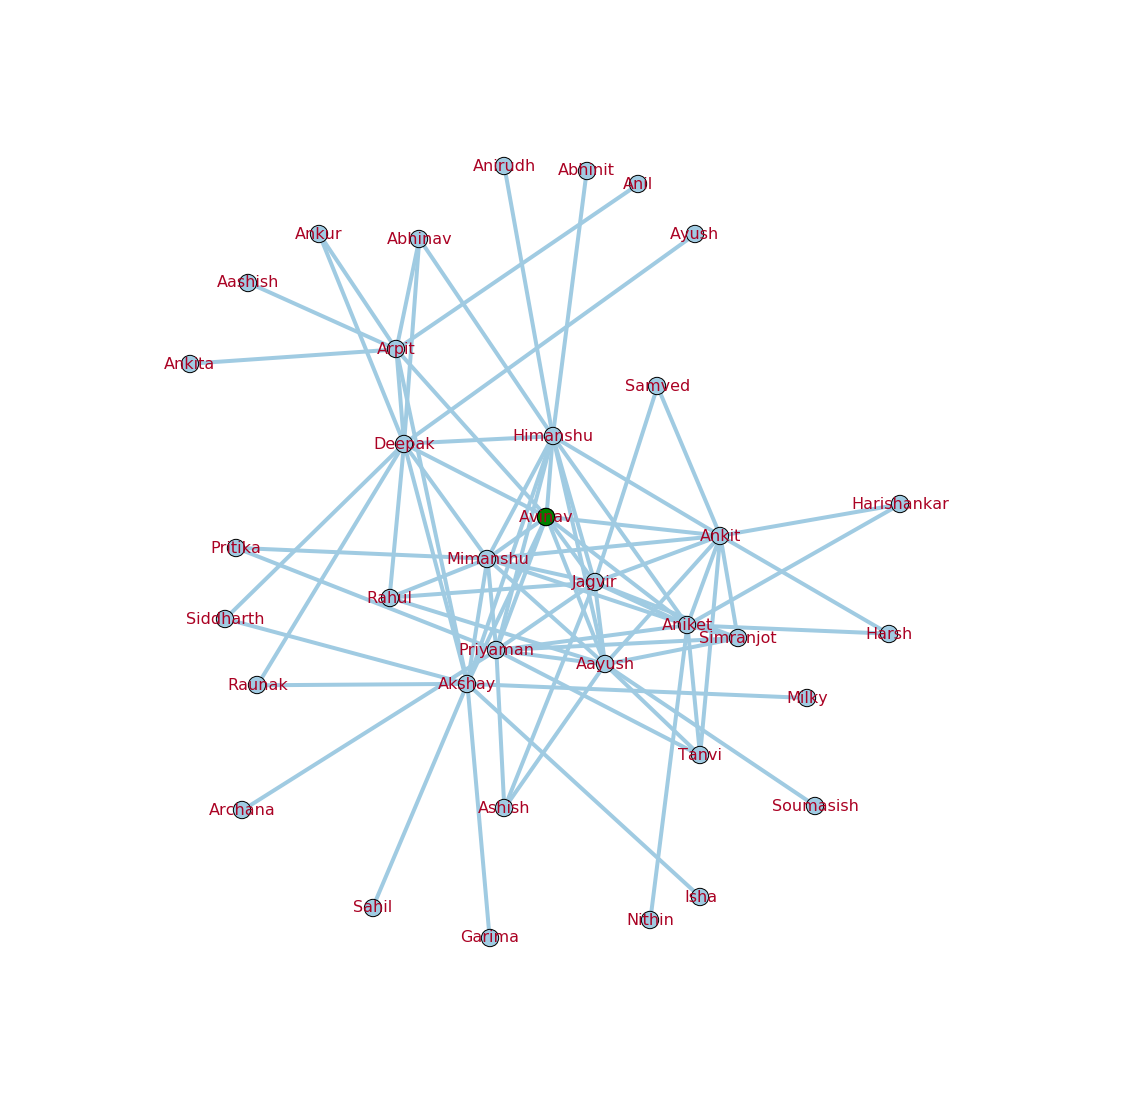

In [45]:
pos=nx.spring_layout(graph)
colors=range(graph.size())
plt.figure(figsize=(15,15))
nx.draw(graph,pos,node_color='#A0CBE2',edge_color="#A0CBE2",width=4)
nx.draw_networkx_nodes(graph,pos,nodelist=["Avinav"],node_size=300,node_color='g')
nx.draw_networkx_labels(graph,pos,font_size=16,font_color='#AA0022')
plt.savefig("friends_graph.png") # save as png
plt.show() # display

In [80]:

data = pickle.load(open('fbdata_10.p','rb'))
df1 = data['df']
adjlist = data['adjlist']
df1.head()

,_name,link,image
0,Avinav Sharan,https://www.facebook.com/avinav.sharan,https://fbcdn-profile-a.akamaihd.net/hprofile-...
1,Jagvir Singh,https://www.facebook.com/jagvir.singh.961,https://fbcdn-profile-a.akamaihd.net/hprofile-...
2,Deepak Sharma,https://www.facebook.com/deepak.jiitn,https://fbcdn-profile-a.akamaihd.net/hprofile-...
3,Mimanshu Shisodia,https://www.facebook.com/mimanshujain,https://fbcdn-profile-a.akamaihd.net/hprofile-...
4,Aayush Uppal,https://www.facebook.com/aayushuppal,https://fbcdn-profile-a.akamaihd.net/hprofile-...


In [92]:
keys = np.sort(np.array(adjlist.keys(),dtype='int'))
keys = np.concatenate((keys,np.array([None]*28)))
df1["outlink"] = pd.Series([adjlist[str(k)] if k is not None else None for k in keys ], index = df1.index)
df1.head()

,_name,link,image,outlink
0,Avinav Sharan,https://www.facebook.com/avinav.sharan,https://fbcdn-profile-a.akamaihd.net/hprofile-...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
1,Jagvir Singh,https://www.facebook.com/jagvir.singh.961,https://fbcdn-profile-a.akamaihd.net/hprofile-...,"[11, 3, 7, 5, 4, 12, 9, 13, 14, 8]"
2,Deepak Sharma,https://www.facebook.com/deepak.jiitn,https://fbcdn-profile-a.akamaihd.net/hprofile-...,"[10, 15, 16, 17, 6, 3, 5, 18, 12, 19]"
3,Mimanshu Shisodia,https://www.facebook.com/mimanshujain,https://fbcdn-profile-a.akamaihd.net/hprofile-...,"[1, 4, 5, 2, 7, 6, 8, 9, 12, 20]"
4,Aayush Uppal,https://www.facebook.com/aayushuppal,https://fbcdn-profile-a.akamaihd.net/hprofile-...,"[1, 3, 5, 7, 12, 8, 11, 14, 21, 22]"


In [93]:
df1.to_csv('fbdata_10.csv',sep=',')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None], dtype=object)